In [3]:
import pandas as pd
df=pd.read_csv("C:\\Users\\Prajwal\\Desktop\\Datasets\\stats_survey.csv")

In [8]:
total_rows=len(df)
null_highschoolprec = df['High_school_perc'].isnull().sum()
null_firstyearperc = df['First_year_perc'].isnull().sum()

percentage_null_highschoolprec = (null_highschoolprec / total_rows) * 100
percentage_null_firstyearperc = (null_firstyearperc / total_rows) * 100

print(f"Percentage of null values in 'Highschoolprec': {percentage_null_highschoolprec:.2f}%")
print(f"Percentage of null values in 'Firstyearperc': {percentage_null_firstyearperc:.2f}%")

Percentage of null values in 'Highschoolprec': 1.72%
Percentage of null values in 'Firstyearperc': 21.18%


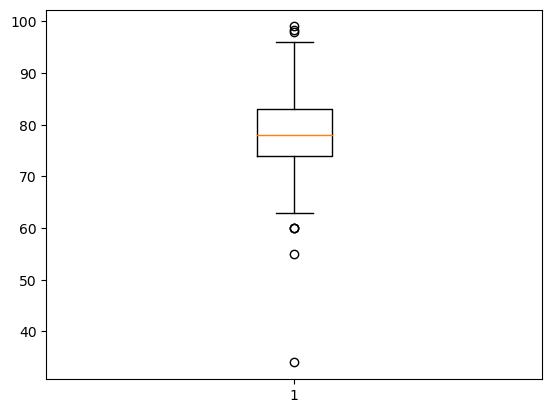

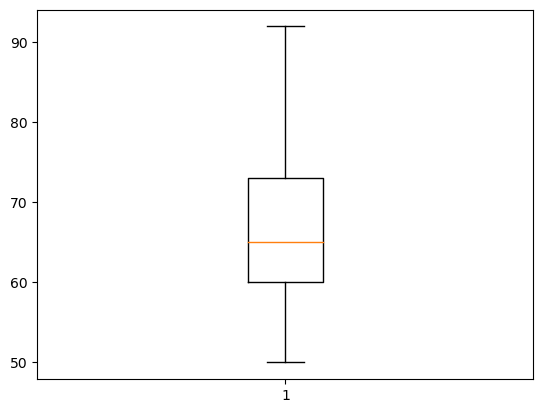

In [9]:
import matplotlib.pyplot as plt

# This column has outliers. so if the column have outliers then we have replace the missing values with median
plt.boxplot(df["High_school_perc"].dropna())
plt.show()

df["High_school_perc"] = df["High_school_perc"].fillna(df["High_school_perc"].median()) #Fill the missing with median

#This colun has no outliers. So if the column have no outliers thenn we have replace the missing values with mean

plt.boxplot(df["First_year_perc"].dropna())
plt.show()

df["First_year_perc"] = df["First_year_perc"].fillna(df["First_year_perc"].mean()) #Fill the missing with mean


## this have catrgorical data. So we have to replace the missing valued with mode
df["Accommodation_status"].mode()
df["Accommodation_status"] = df["Accommodation_status"].fillna("Private accommodation/ stay with family/friends")

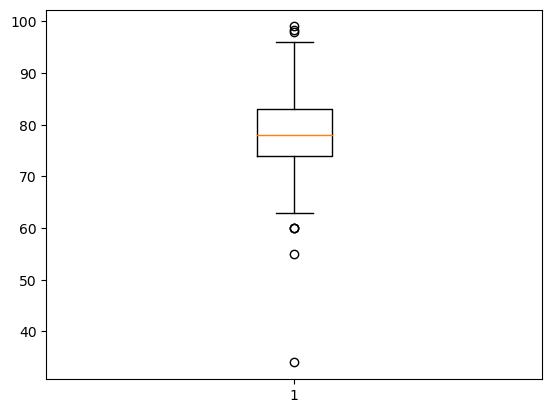

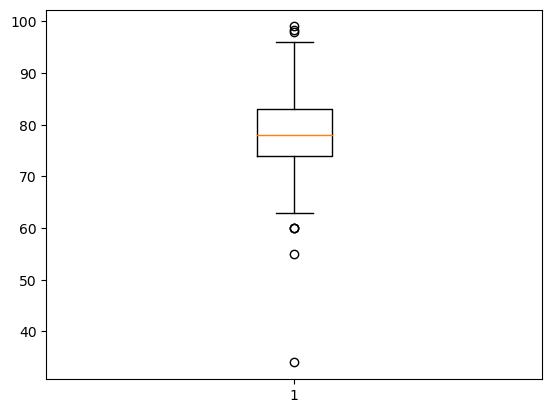

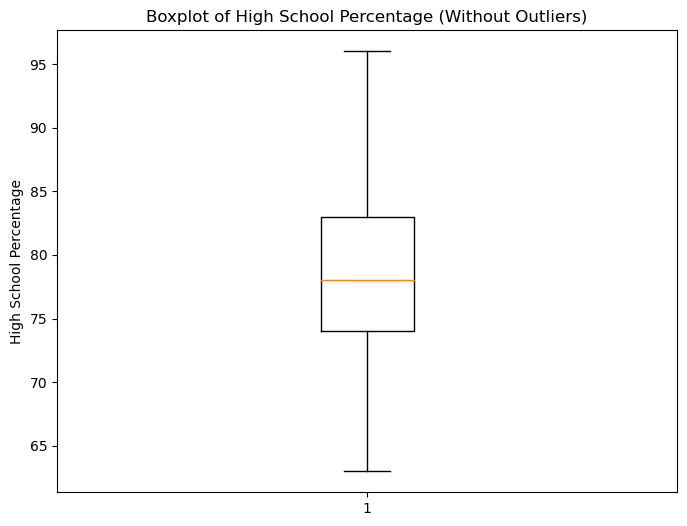

In [11]:
# This column has outliers. so if the column have outliers then we have replace the missing values with median
plt.boxplot(df["High_school_perc"].dropna())
plt.show()

df["High_school_perc"] = df["High_school_perc"].fillna(df["High_school_perc"].median()) #Fill the missing with median

## After fill missing values plot the graph

plt.boxplot(df["High_school_perc"].dropna())
plt.show()


# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = df['High_school_perc'].quantile(0.25)
Q3 = df['High_school_perc'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df_no_outliers = df[(df['High_school_perc'] >= lower_bound) & (df['High_school_perc'] <= upper_bound)]

plt.figure(figsize=(8, 6))
plt.boxplot(df_no_outliers['High_school_perc'])
plt.title('Boxplot of High School Percentage (Without Outliers)')
plt.ylabel('High School Percentage')
plt.show()


In [3]:
import pandas as pd
df=pd.read_csv("C:\\Users\\Prajwal\\Desktop\\Datasets\\stats_survey.csv")

day_dict1 = {"4+": 4, "0": 0, "1": 1, "2": 2, "3":3} #replace this values

day_dict = {"01-Mar": 1, "03-May": 2, "05-Aug": 3, "8+":2} #replace this values


df["Classes_skipped"] = df["Classes_skipped"].map(day_dict1)

df["No_of_drinks"] = df["No_of_drinks"].map(day_dict)

df["No_of_drinks"].corr(df["Classes_skipped"])

0.24108650664990042

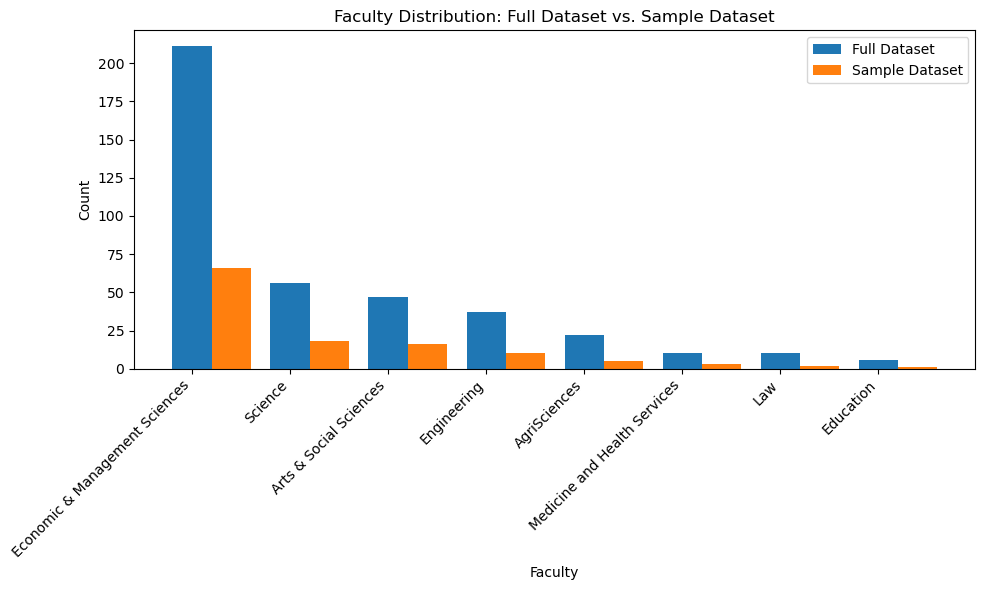

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset from the CSV file
data = pd.read_csv("C:\\Users\\Prajwal\\Desktop\\Datasets\\stats_survey.csv")

# Determine the sample size (e.g., 20% of the dataset)
sample_size = int(0.3 * len(data))

# Perform simple random sampling
sample = data.sample(n=sample_size, random_state=42)

# Count the occurrences of faculty in the full dataset
faculty_counts_full = data['Dept'].value_counts()

# Count the occurrences of faculty in the sample dataset
faculty_counts_sample = sample['Dept'].value_counts()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bar graph for the full dataset
ax.bar(range(len(faculty_counts_full)), faculty_counts_full.values, width=0.4, align='edge', label='Full Dataset')

# Plot the bar graph for the sample dataset
ax.bar([x + 0.4 for x in range(len(faculty_counts_sample))], faculty_counts_sample.values, width=0.4, align='edge', label='Sample Dataset')

# Set the x-axis ticks and labels
ax.set_xticks([x + 0.2 for x in range(len(faculty_counts_full))])
ax.set_xticklabels(faculty_counts_full.index)

# Add labels and title
ax.set_xlabel('Faculty')
ax.set_ylabel('Count')
ax.set_title('Faculty Distribution: Full Dataset vs. Sample Dataset')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Add a legend
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

In [14]:
ax.bar(range(len(faculty_counts_full)), faculty_counts_full.values, width=0.4, align='edge', label='Full Dataset')

<BarContainer object of 8 artists>

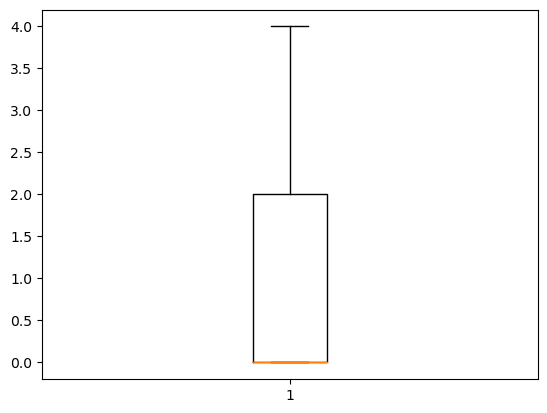

Probability of success (p): 0.47


C:\Users\Prajwal\AppData\Local\Temp\ipykernel_9004\2747462230.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alcohol_data['Success'] = alcohol_data.apply(define_success)


In [17]:
import pandas as pd
import matplotlib.pyplot as plt


df=pd.read_csv("C:\\Users\\Prajwal\\Desktop\\Datasets\\stats_survey.csv")


day_dict1 = {"4+": 4, "0": 0, "1": 1, "2": 2, "3":3} #replace this values

df["Classes_skipped"] = df["Classes_skipped"].map(day_dict1)

plt.boxplot(df["Classes_skipped"].dropna())
plt.show()

df["Classes_skipped"] = df["Classes_skipped"].fillna(df["Classes_skipped"].mean())

# Extracting relevant data
alcohol_data = df["Classes_skipped"]
# Define a function to determine success (1) or failure (0) based on the number of classes missed
def define_success(x):
    if x > 0:
        return 1  # Success: student missed at least one class due to alcohol reasons
    else:
        return 0  # Failure: student did not miss any classes due to alcohol reasons

# Applying the function to create a new column indicating success or failure
alcohol_data['Success'] = alcohol_data.apply(define_success)

# Calculating the probability of success (p)
total_students = len(alcohol_data)
success_count = alcohol_data['Success'].sum()
p = success_count / total_students

print("Probability of success (p):", round(p,2))

In [20]:
df

,Timestamp,Gender,High_school_perc,College_year_in_2023,Dept,First_year_perc,Accommodation_status,monthly_allowance,Scholarship_status,Additional_hours_study,Social_activity_frequency,No_of_drinks,Classes_skipped,No_of_failed_modules,Parents_approval,Relationship_with_parents
0,2024/03/07 5:12:01 pm EET,Female,76.0,2nd Year,Arts & Social Sciences,72.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,8+,Only weekends,8+,3.0,0,Yes,Very close
1,2024/03/07 5:12:08 pm EET,Male,89.0,2nd Year,Economic & Management Sciences,75.0,Private accommodation/ stay with family/friends,R 7001 - R 8000,"Yes (NSFAS, etc...)",8+,Only weekends,03-May,4.0,0,Yes,Very close
2,2024/03/07 5:12:25 pm EET,Male,76.0,1st Year,AgriSciences,55.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,03-May,2,8+,3.0,0,Yes,Very close
3,2024/03/07 5:12:28 pm EET,Male,89.0,2nd Year,Engineering,84.0,Private accommodation/ stay with family/friends,R 6001 - R 7000,No,03-May,3,8+,2.0,0,Yes,Very close
4,2024/03/07 5:13:00 pm EET,Female,74.0,2nd Year,Arts & Social Sciences,52.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,03-May,Only weekends,05-Aug,1.0,3,Yes,Fair
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,2024/03/12 11:05:33 am EET,Female,74.0,NaN,Science,NaN,Private accommodation/ stay with family/friends,NaN,No,03-May,3,01-Mar,0.0,0,Yes,Close
402,2024/03/12 3:26:14 pm EET,Female,73.0,2nd Year,Economic & Management Sciences,58.0,Private accommodation/ stay with family/friends,R 6001 - R 7000,"Yes (NSFAS, etc...)",05-Aug,1,8+,0.0,0,Yes,Very close
403,2024/03/13 10:32:19 pm EET,Female,86.0,1st Year,NaN,NaN,Private accommodation/ stay with family/friends,R 4001- R 5000,No,05-Aug,2,03-May,1.0,0,Yes,Very close
404,2024/03/13 10:32:27 pm EET,Male,85.0,NaN,Economic & Management Sciences,NaN,Private accommodation/ stay with family/friends,R 4001- R 5000,No,01-Mar,4+,05-Aug,4.0,0,Yes,Close


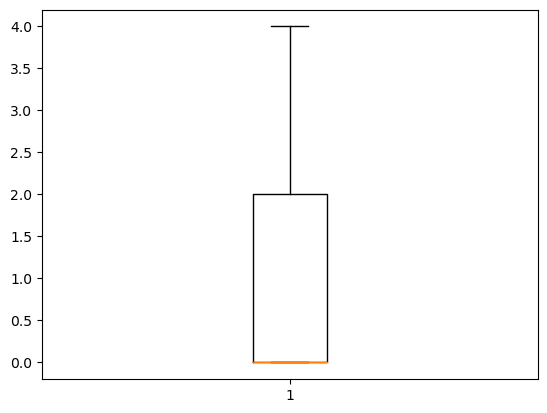

Average number of alcohol-related absences per week (lambda): 0.95
Probability of missing exactly 2 classes in a week due to alcohol-related reasons: 0.17


In [21]:
from scipy.stats import poisson
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df=pd.read_csv("C:\\Users\\Prajwal\\Desktop\\Datasets\\stats_survey.csv")

# Replace string values in "Classes_skipped" column with numeric values
day_dict1 = {"4+": 4, "0": 0, "1": 1, "2": 2, "3": 3}
df["Classes_skipped"] = df["Classes_skipped"].map(day_dict1)

# Visualize the distribution of classes skipped
plt.boxplot(df["Classes_skipped"].dropna())
plt.show()

# Fill missing values in "Classes_skipped" with the mean
df["Classes_skipped"] = df["Classes_skipped"].fillna(df["Classes_skipped"].mean())

# Calculate the average number of alcohol-related absences per week (lambda)
lambda_ = df["Classes_skipped"].mean()

# Define the number of classes missed due to alcohol-related reasons (k)
k = 2  # Change this value as needed

# Calculate the probability of exactly k classes missed in a week due to alcohol-related reasons using the Poisson distribution
probability = poisson.pmf(k, lambda_)

print(f"Average number of alcohol-related absences per week (lambda): {round(lambda_, 2)}")
print(f"Probability of missing exactly {k} classes in a week due to alcohol-related reasons: {round(probability, 2)}")
